Accuracy for K values: {1: 0.9777777777777777, 2: 0.9777777777777777, 3: 1.0, 4: 0.9777777777777777, 5: 1.0, 6: 1.0, 7: 1.0, 8: 1.0, 9: 1.0, 10: 1.0}


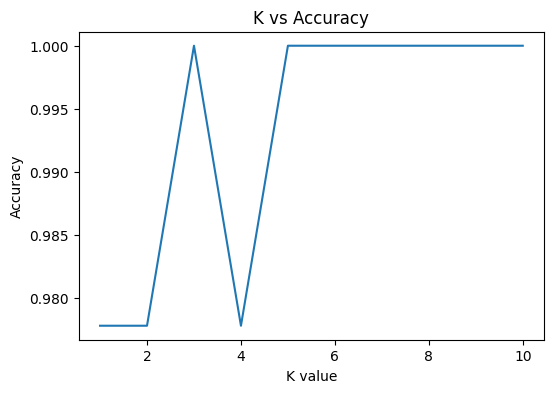

Best K = 3

Confusion Matrix:
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from matplotlib.colors import ListedColormap
df = pd.read_csv("/content/Iris.csv")
df.head()
X = df.drop(columns=["Species", "Id"])
y = df["Species"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y,
                                                    test_size=0.3, random_state=42)
results = {}
for k in range(1, 11):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    results[k] = accuracy_score(y_test, pred)
print("Accuracy for K values:", results)
plt.figure(figsize=(6,4))
plt.plot(list(results.keys()), list(results.values()))
plt.xlabel("K value")
plt.ylabel("Accuracy")
plt.title("K vs Accuracy")
plt.show()
best_k = max(results, key=results.get)
print("Best K =", best_k)
best_model = KNeighborsClassifier(n_neighbors=best_k)
best_model.fit(X_train, y_train)
pred = best_model.predict(X_test)
cm = confusion_matrix(y_test, pred)
print("\nConfusion Matrix:")
print(cm)